In [105]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import random

a, b)
As dimensões da array carregada são: (400, 500, 3)


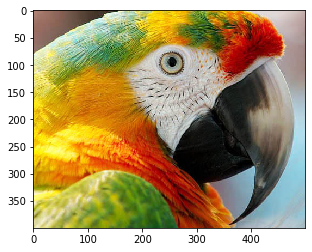

In [106]:
img = cv2.imread('img2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('a, b)')
print('As dimensões da array carregada são:', img.shape)
plt.imshow(img)
plt.show()

In [107]:
print('c)')
img_2D = np.zeros((img.shape[0]*img.shape[1],2))
img_2D = [[] for i in range(img.shape[0]*img.shape[1])]
row = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        #print(img[i][j])
        img_2D[row] = img[i][j]
        row += 1
img_2D = np.array(img_2D)
print('As novas dimensões da array 2D são:', img_2D.shape)

c)
As novas dimensões da array 2D são: (200000, 3)


In [108]:
random_int_1000 = random.sample(range(img_2D.shape[0]), 1000)
x_train = np.zeros((1000, 3))
for index, value in enumerate(random_int_1000):
    x_train[index, :] = img_2D[value, :]

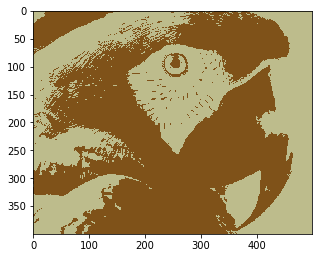

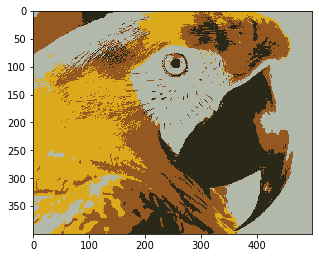

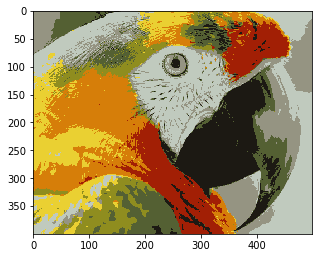

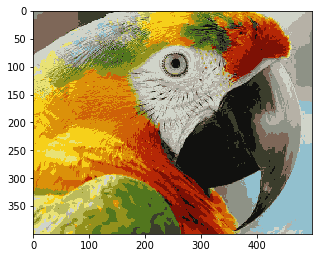

In [109]:
for clusters in [2,4,8,16]:
    km = KMeans(n_clusters=clusters, init='k-means++', verbose=0)
    #d)
    km.fit(x_train)
    #e)
    km.predict(img_2D)
    c = np.zeros((clusters, 3))
    for j in range(0,clusters):
        c[j,0] = km.cluster_centers_[j][0]
        c[j,1] = km.cluster_centers_[j][1]
        c[j,2] = km.cluster_centers_[j][2] 
        
    x = img_2D
        
    matrix_new = np.zeros((x.shape[0],c.shape[0]))
    for i in range(c.shape[0]):
        for k in range(x.shape[0]):
            dist = 0
            for l in range(x.shape[1]):
                dist = dist + (x[k,l] - c[i,l])**2
            matrix_new[k,i] = np.sqrt(dist)

    #recalculate the centroids
    index = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
        q = np.argmin(matrix_new[i,:])
        index[i,0] = q
    
    fig = plt.figure(figsize=(5,5))
    for i in range(clusters):
        idx = np.argwhere(index == i)
        for column0 in range(idx.shape[0]):
            row = int(idx[column0, 0]/img.shape[1])
            column = int(idx[column0, 0] - row*img.shape[1])
            #f)
            img[row, column] = c[i]
    #g)        
    plt.imshow(img)
    plt.show()

In [118]:
img_original = cv2.imread('img2.jpg')
img_original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
color_list = []
for i in range(img_original.shape[0]):
    for j in range(img_original.shape[1]):
        if str(img_original[i, j][0]) + str(img_original[i, j][1]) + str(img_original[i, j][2]) not in color_list:
            color_list.append(str(img_original[i, j][0]) + str(img_original[i, j][1]) + str(img_original[i, j][2]))
print('Numero de RGB diferentes na imagen original:', len(color_list))

Numero de RGB diferentes na imagen original: 16


## h)
## O tamanho de todas as imagens é: 3 cores x 8 bits x 400 rows x 500 columns = 4.8 Mbits
## Na verdade se a imagen é armazenada com algum formato de compressaon já seja JPG, PNG, etc, entao a imagen vai ter menor tamanho quando ela tem menor número de cores